In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv(r"C:\\Users\\Archit\\Downloads\\10_Property_stolen_and_recovered.csv")

### Understanding data

In [3]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Area_Name                    2449 non-null   object
 1   Year                         2449 non-null   int64 
 2   Group_Name                   2449 non-null   object
 3   Sub_Group_Name               2449 non-null   object
 4   Cases_Property_Recovered     2449 non-null   int64 
 5   Cases_Property_Stolen        2449 non-null   int64 
 6   Value_of_Property_Recovered  2449 non-null   int64 
 7   Value_of_Property_Stolen     2449 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 153.2+ KB


In [6]:
df.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

### Explore and visualize data to gain insights

In [11]:
df.Area_Name.value_counts()

Area_Name
Andaman & Nicobar Islands    70
Puducherry                   70
Maharashtra                  70
Manipur                      70
Meghalaya                    70
Mizoram                      70
Nagaland                     70
Odisha                       70
Punjab                       70
Andhra Pradesh               70
Rajasthan                    70
Sikkim                       70
Tamil Nadu                   70
Tripura                      70
Uttar Pradesh                70
Uttarakhand                  70
Madhya Pradesh               70
Kerala                       70
Delhi                        70
Daman & Diu                  70
Arunachal Pradesh            70
Assam                        70
Bihar                        70
Chandigarh                   70
Chhattisgarh                 70
Dadra & Nagar Haveli         70
West Bengal                  70
Karnataka                    70
Goa                          70
Gujarat                      70
Haryana                      7

In [13]:
df.Year.value_counts()

Year
2001    245
2002    245
2003    245
2004    245
2005    245
2006    245
2008    245
2009    245
2010    245
2007    244
Name: count, dtype: int64

In [16]:
df.Group_Name.value_counts()

Group_Name
Burglary - Property                    350
Criminal Breach of Trust - Property    350
Dacoity -Property                      350
Other heads of Property                350
Robbery - Property                     350
Theft - Property                       350
Total Property                         349
Name: count, dtype: int64

In [18]:
df.Sub_Group_Name.value_counts()

Sub_Group_Name
3. Burglary                             350
5. Criminal Breach of Trust             350
1. Dacoity                              350
6. Other Property                       350
2. Robbery                              350
4. Theft                                350
7. Total Property Stolen & Recovered    349
Name: count, dtype: int64

In [26]:
df[df['Group_Name'] == 'Criminal Breach of Trust - Property'].Area_Name.value_counts()

Area_Name
Andaman & Nicobar Islands    10
Puducherry                   10
Maharashtra                  10
Manipur                      10
Meghalaya                    10
Mizoram                      10
Nagaland                     10
Odisha                       10
Punjab                       10
Lakshadweep                  10
Rajasthan                    10
Sikkim                       10
Tamil Nadu                   10
Tripura                      10
Uttar Pradesh                10
Uttarakhand                  10
Madhya Pradesh               10
Kerala                       10
Andhra Pradesh               10
Daman & Diu                  10
Arunachal Pradesh            10
Assam                        10
Bihar                        10
Chandigarh                   10
Chhattisgarh                 10
Dadra & Nagar Haveli         10
Delhi                        10
Karnataka                    10
Goa                          10
Gujarat                      10
Haryana                      1

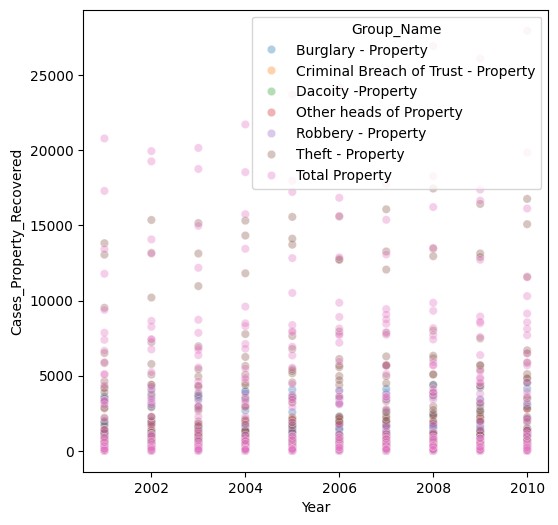

In [60]:
plt.figure(figsize=(6,6))
sns.scatterplot(df, x='Year', y='Cases_Property_Recovered', alpha=0.35, hue="Group_Name")
plt.show()

In [30]:
df

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
...,...,...,...,...,...,...,...,...
2444,Tamil Nadu,2010,Total Property,7. Total Property Stolen & Recovered,16125,21509,660311804,1317919190
2445,Tripura,2010,Total Property,7. Total Property Stolen & Recovered,192,879,5666102,33032746
2446,Uttar Pradesh,2010,Total Property,7. Total Property Stolen & Recovered,9130,35068,577591772,1442670414
2447,Uttarakhand,2010,Total Property,7. Total Property Stolen & Recovered,964,2234,47135685,123398840


### Handling Text and Categorical attributes

In [67]:
df

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
...,...,...,...,...,...,...,...,...
2444,Tamil Nadu,2010,Total Property,7. Total Property Stolen & Recovered,16125,21509,660311804,1317919190
2445,Tripura,2010,Total Property,7. Total Property Stolen & Recovered,192,879,5666102,33032746
2446,Uttar Pradesh,2010,Total Property,7. Total Property Stolen & Recovered,9130,35068,577591772,1442670414
2447,Uttarakhand,2010,Total Property,7. Total Property Stolen & Recovered,964,2234,47135685,123398840
